## Забелина Инесса 303 группа. Задача 2, Вариант 4.

## 1. Постановка задачи 

##### Используя метод переменных направлений, решить краевую задачу:   
\begin{cases}
\frac{\partial u}{\partial t} = 9\Delta u, \; 0 < x < \frac{\pi}{2},\; 0 < y < \pi, \;t>0 \\
u|_{x = 0} = u|_{x = \pi/2} = 0, \\
u|_{y = 0} = u|_{y = \pi} = 0, \\
u|_{t = 0} = sin(2x)  sin( 3y).
\end{cases}

## 2. Аналитическое решение

Будем искать решение системы в виде:
$$u(x,y,t) =\sum_{n=0}^\infty \sum_{m=0}^\infty X_{n}(x)Y_{m}(y)T_{nm}(t).$$
Подставим ряд в первое уравнение и получим:

$$   X_{n}(x)Y_{m}(y)T^{'}_{nm}(t) = 9 \cdot (X^{''}_{n}(x)Y_{m}(y) + X_{n}(x)Y^{''}_{m}(y))\cdot T_{nm}(t) \\ $$ 
Методом разделения переменных получим:
$$ \frac{T^{'}_{nm}(t)}{9\cdot T_{nm}(t)} =\frac {X^{''}_{n}(x)}{X_{n}(x)} + \frac {Y^{''}_{m}(y)}{Y_{m}(y)} = - \lambda_{nm}$$

Таким образом, получаем две задачи Штурма-Лиувилля - для $X_{n}(x)$ и $Y_{m}(y)$:

\begin{cases}
X^{''}_{n}(x) + \mu_{n} \cdot X_{n}(x) = 0  \\
    X_{n}(0) =  X_{n}(\pi/2) = 0, \\
    \end{cases}
    
   \begin{cases}
    Y^{''}_{m}(x) + \nu_{m} \cdot Y_{m}(x) = 0  \\
    Y_{m}(0) =  Y_{m}(\pi) = 0, \\
    \end{cases}
    
где  $  \mu_{n}+\nu_{m}=\lambda_{nm}$.

__Их решения имеют вид:__

\begin{cases}
 X_{n}(x) = sin (2nx)  \\
    \mu_{n} = (2n)^2 , n = 1,2,.. \\
    \end{cases}
    
   \begin{cases}
   Y_{m}(y) = sin(my)  \\
    \nu_{m} = m^2, m = 1,2,.. \\
    \end{cases}
    


Для функций $ T_{nm}(t) $ имеем задачу :

\begin{cases}
  T^{'}_{nm}(t) + 9\cdot \lambda_{nm} \cdot T_{nm}(t) = 0 ,\; t>0 ,\\
  \lambda_{nm} =(2n)^2 + m^2\\
  \end{cases}
  
Решение имеет вид: 

$$ T_{nm}(t) = A_{nm}\cdot e^{-9 \lambda_{nm}t}$$

Следовательно, получаем:
$$u(x,y,t) =\sum_{n=0}^\infty \sum_{m=0}^\infty A_{nm}\cdot e^{-9 \lambda_{nm}t} \cdot  sin (2nx) sin(my),\; где  \; \lambda_{nm} =(2n)^2 + m^2$$

Подставим начальное условие $ u|_{t = 0} = sin(2x)  sin( 3y)$ и получим: 

$$u(x,y,0) =\sum_{n=0}^\infty \sum_{m=0}^\infty A_{nm} \cdot  sin (2nx) sin(my) = sin(2x)  sin( 3y) $$

Получаем $A_{nm} = 0$ при $n \neq 1, m \neq 3$

__Таким образом, решение задачи имеет вид:__
$$ u(x,y,t) = e^{-9 \cdot 13 t} \cdot  sin (2x) sin(3y) $$

### Нарисуем аналитическое решение:

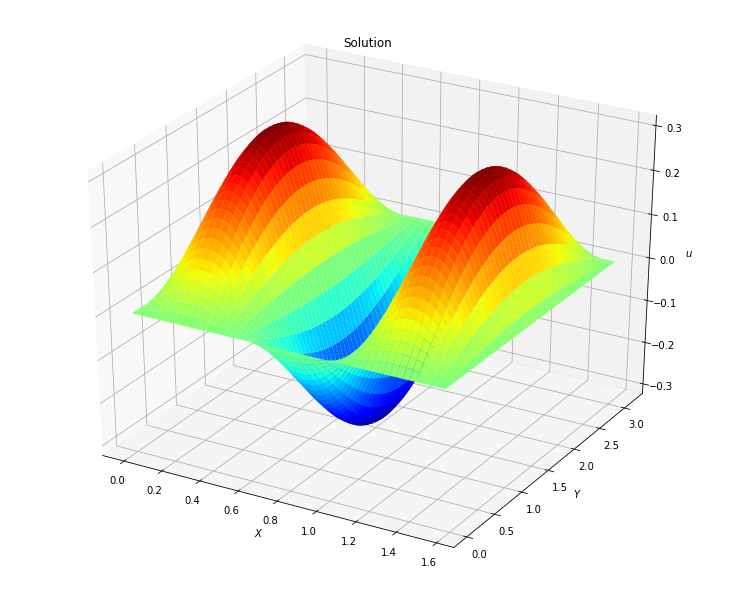

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
N = 100
M = 100
u = np.zeros((N, M))
x = np.linspace(0, np.pi/2, N)
y = np.linspace(0, np.pi, M)
t = 0.01
for i in range(N):
    for j in range(M):
        u[i][j] = np.exp(-9*13*t)*np.sin(2*x[i])*np.sin(3*y[j]) 


X, Y = np.meshgrid(x, y)

frame = plt.figure(figsize=(10,8))
axes = Axes3D(frame)
axes.plot_surface(X,Y,u,cmap='jet')
#axes.view_init(10, 100)
axes.set_xlabel('$X$')
axes.set_ylabel('$Y$')
axes.set_zlabel('$u$')
axes.set_title('Solution')
plt.show()

## 3. Численное решение 

### 3.1 Построение разностной схемы

#### Введем в расчетной области равномерную сетку

$$\begin{cases}
  x_n = n h_x,\;  n = 0,1,..., N;\;  N h_x = \frac{\pi}{2}\\
 y_m = m h_y,\;  m = 0,1,..., M;\;  M h_y = \pi\\
t_j=j\tau,\;j=0,1,...,J;\; J\tau=T 
\end{cases}$$





#### Аппроксимируем оператор Лапласа $\Delta = \frac{\partial^2 }{{\partial x}^2} + \frac{\partial^2 }{{\partial y}^2}$ разностным оператором $\Lambda u = \Lambda _1 u + \Lambda _2 u$, где

$$\begin{aligned}
\Lambda _1 u = u_{\widetilde{x} x} =  \frac{u_{n-1,m}-2u_{n,m}+u_{n+1,m}}{h_x^{2}}, \\
\Lambda _{2} u = u_{\widetilde{y} y} = \frac{u_{n,m-1}-2u_{n,m}+u_{n,m+1}}{h_y^{2}}. \\
\end{aligned} $$

Решение разностной схемы обозначим $\omega$.

**Начальное условие задачи аппроксимируется точно:** 

$w^{0}_{n,m} = sin(2\cdot x_{n})sin(3\cdot y_{m}),~~m=0,1,...,M,~~n=0,1,...,N. $


На каждом целом слое j по времени **граничные условия** задачи также аппроксимируются точно:

$w^{j}_{0,m} = 0, ~~~w^{j}_{N,m} = 0, ~~~m=0,1,...,M,$

$w^{j}_{n,0} = 0, ~~~w^{j}_{n,M} = 0, ~~~n=0,1,...,N.$



### 3.2 Метод переменных направлений

Будем осуществлять переход со слоя $j$ на слой $j+1$  в два этапа, с помощью вспомогательного промежуточного слоя $j+1/2$. 

### Переход $~j \longrightarrow j + 1/2:$

Пусть значения $w~^{j}_{n,m}$ на слое $j$ уже известны (на самом первом шаге по времени значения $w~^{0}_{n,m} = u_{0}(x_{n}, y_{m})$ известны из начального условия). Перейдем на вспомогательный промежуточный слой $j + 1/2$, используя **неявную схему по переменной $x$ и явную - по переменной $y$:**

* Заменим выражение $\frac{\partial^2 }{{\partial x}^2}$ разностным аналогом, взятым на слое $~j+1/2: ~~\Lambda _1 w~^{j + 1/2}$.

* А выражение $\frac{\partial^2 }{{\partial y}^2}$ разностным аналогом, взятым на слое $~j:~~\Lambda _2 w~^j$. 

В результате придем к разностному уравнению: 

$ \frac{w~^{j+1/2}-w~^j}{0.5 \tau} = 9\cdot( \Lambda _1 w~^{j+1/2} + \Lambda _2 w~^{j}) $

Соответствующая система уравнений имеет вид:

$$\begin{cases}
\frac{w~^{j+1/2}_{n,m} - w~^j_{n,m}}{0.5 \tau} = ~\frac{9}{{h_x}^2}( ~w~^{j+1/2}_{n+1, ~m}- ~2w~^{j+1/2}_{n, ~m}+ ~w~^{j+1/2}_{n-1, ~m}~)+\frac{9}{{h_y}^2} (~w~^{j}_{n, ~m+1}-2w~^{j}_{n, ~m}+ ~w~^{j}_{n, ~m-1}~),\\ ~~~~~~~~~~~~~~~где~ n = 1,2, ...,N-1,~m=1,2,...,M-1,\\
\\w~^{j+1/2}_{0,m} = 0,~~~~w~^{j+1/2}_{N,m} = 0, ~~где~~ m=1,2,...,M-1.\\
\end{cases}
$$


При каждом фиксированным $m=1,...,M-1$ систему выше можно переписать следующим образом:

$$\begin{cases}
\frac{4.5\tau}{{h_x}^2} ~w~^{j+1/2}_{n-1,m} - \left(1+\frac{9\tau}{{h_x}^2}\right) ~w~^{j+1/2}_{n,m} + \frac{4.5\tau}{{h_x}^2} ~w~^{j+1/2}_{n+1, ~m}= -(~w~^{j}_{n, ~m} + \frac{4.5\tau}{{h_y}^2} ~(w~^{j}_{n, ~m+1}-~2w~^{j}_{n, ~m}+~w~^{j}_{n, ~m-1})), ~~где~~ n=1,2,...,N-1,\\
w~^{j+1/2}_{0,m} = 0,~~~~w~^{j+1/2}_{N,m} = 0 .\\
\end{cases}$$

#### Введем обозначения:

$A^x=B^x=\frac{4.5\tau}{{h_x}^2}~, ~~~C^x=\left(1+\frac{9\tau}{{h_x}^2}\right),$

$F^x_n=~w~^{j}_{n, ~m} + \frac{4.5\tau}{{h_y}^2} ~\left(w~^{j}_{n, ~m+1}-~2w~^{j}_{n, ~m}+~w~^{j}_{n, ~m-1}\right).$

Получим систему:

$$\begin{cases}
A^x w~^{j+1/2}_{n-1,m} - C^x w~^{j+1/2}_{n,m} +B^x w~^{j+1/2}_{n+1,m} = -F^x_n,\\
w~^{j+1/2}_{0,m} = 0,~~~~w~^{j+1/2}_{N,m} = 0
\end{cases}$$


Система представляет из себя СЛАУ с трёхдиагональной матрицей, которую можно решить методом прогонки.

### Переход $~j + 1/2\longrightarrow j+1:$



Переход с промежуточного слоя $~j + 1/2$ на слой $~j + 1$ осуществим, используя **явную схему по $x$ и неявную - по $y$**:

$$ \frac{w~^{j+1}-w~^{j+1/2}}{0.5 \tau} =9( \Lambda _{1} w~^{j+1/2} + \Lambda_{2} w~^{j+1})  $$


Соответствующая система уравнений имеет вид:

$$\begin{cases}
\frac{w~^{j+1}_{n,m} - w~^{j+1/2}_{n,m}}{0.5 \tau} = ~\frac{9}{{h_x}^2}( ~w~^{j+1/2}_{n+1, ~m}- ~2w~^{j+1/2}_{n, ~m}+ ~w~^{j+1/2}_{n-1, ~m}~)+\frac{9}{{h_y}^2} (~w~^{j+1}_{n, ~m+1}-2w~^{j+1}_{n, ~m}+ ~w~^{j+1}_{n, ~m-1}~),\\ ~~~~~~~~~~~~~~~где~ n = 1,2, ...,N-1,~m=1,2,...,M-1,\\
\\w~^{j+1}_{n,0} = 0,~~~~w~^{j+1}_{n,M} = 0, ~~где~~ n=1,2,...,N-1.\\
\end{cases}
$$

При каждом фиксированным $n=1,...,N-1$ систему выше можно переписать следующим образом:

$$\begin{cases}
\frac{4.5\tau}{{h_y}^2} ~w~^{j+1}_{n,m-1} - \left(1+\frac{9\tau}{{h_y}^2}\right) ~w~^{j+1}_{n,m} + \frac{4.5\tau}{{h_y}^2} ~w~^{j+1}_{n,~m+1}= -(~w~^{j+1/2}_{n, ~m} + \frac{4.5\tau}{{h_x}^2} ~(w~^{j+1/2}_{n+1, ~m}-~2w~^{j+1/2}_{n,~m}+~w~^{j+1/2}_{n-1, ~m})), ~~где~~ \\ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~m=1,2,...,M-1,\\
w~^{j+1}_{n,0} = 0,~~~~w~^{j+1}_{n,M} = 0 .\\
\end{cases}$$

#### Введем обозначения:

$A^y=B^y=\frac{4.5\tau}{{h_y}^2}~, ~~~C^y=\left(1+\frac{9\tau}{{h_y}^2}\right),$

$F^y_m=~w~^{j+1/2}_{n, ~m} + \frac{4.5\tau}{{h_x}^2} ~\left(w~^{j+1/2}_{n+1, ~m}-~2w~^{j+1/2}_{n, ~m}+~w~^{j+1/2}_{n-1, ~m}\right).$

Получим систему:

$$\begin{cases}
A^y w~^{j+1}_{n,m-1} - C^y w~^{j+1}_{n,m} +B^y w~^{j+1}_{n,m+1} = -F^y_m,\\
w~^{j+1}_{n,0} = 0,~~~~w~^{j+1}_{n,M} = 0
\end{cases}$$


Система представляет из себя СЛАУ с трёхдиагональной матрицей, которую можно решить методом прогонки.

### 3.3 Метод прогонки

Рассмотрим систему:

$$\begin{cases}
A^x w~^{j+1/2}_{n-1,m} - C^x w~^{j+1/2}_{n,m} +B^x w~^{j+1/2}_{n+1,m} = -F^x_n,\\
w~^{j+1/2}_{0,m} = 0,~~~~w~^{j+1/2}_{N,m} = 0
\end{cases}$$

Сделаем замену: $z_{n-1} = w~^{j+1/2}_{n-1,m},~~ z_{n} = w~^{j+1/2}_{n,m}, ~~ z_{n+1} = w~^{j+1/2}_{n+1,m}$

$$\begin{cases}
A^x z_{n-1} - C^x z_{n} +B^x z_{n+1} = -F^x_n,\\
z_{0} = 0,~~~z_{N} = 0
\end{cases}$$

#### Прямой ход прогонки:

Найдём все коэффиценты прогонки $\alpha _n$ и $\beta _n$ через известные $\alpha _0$ и $\beta _0\$.

 $~~~z_n = \alpha _{n}\cdot z_{n+1}+\beta _{n}$

Тогда $~z_{n-1}(z_n)$:
$~~~z_{n-1}=\alpha _{n-1} z_n + \beta _{n-1}= \alpha _{n-1} \alpha _{n}z_{n+1} +\alpha _{n-1} \beta _{n} + \beta _{n-1}$

В результате после подстановки в первое уравнение системы, получим:

$$
A^x\left(\alpha _{n-1} \alpha _{n}z_{n+1} +\alpha _{n-1} \beta _{n} + \beta _{n-1}\right) - C^x\left(\alpha _{n} ~z_{n+1} +\beta _{n}\right) +B^x~z_{n+1} = -F^x_n
$$

Приравняв коэффициенты при одинаковых степенях $~z_{n+1}$, получим :

$$
\begin{cases}
A^x\alpha _{n-1} \alpha _{n} - C^x\alpha _{n} + B^x =0\\
A^x\alpha _{n-1} \beta _{n} +A^x\beta _{n-1}- C^x\beta _{n} + F^x_n =0
\end{cases}
$$

Выразим $\alpha _{n}(\alpha _{n-1})$ и $~\beta _{n}(~\beta _{n-1})$:

$$
\alpha _{n}=\frac{B^x}{C^x-A^x\alpha _{n-1}},~~\beta _{n} = \frac{A^x\beta _{n-1}+F^x_n}{C^x-A^x\alpha _{n-1}}, ~n=1,2,..,N
$$

Из  граничных условий:
$$
z_0=\alpha_0 z_1+\beta _0 = 0 \Rightarrow \alpha _0 = 0, \beta _0 = 0
$$

В итоге получим формулы для прямой прогонки:

$$
\left\{\begin{array}{l}
\alpha _{n}=\frac{B^x}{C^x-A^x\alpha _{n-1}},~~\beta _{n} = \frac{A^x\beta _{n-1}+F^x_n}{C^x-A^x\alpha _{n-1}}, ~n=1,2,3,...,N
\\\alpha_0=0,~~\beta_0=0
\end{array}\right.
$$

#### Обратный ход прогонки:

По найденным коэффициентам $\alpha_{n},  \beta_{n}$  и известному z_N вычислим z_n :
 
 
$$\left\{\begin{array}{l}
z_n = \alpha _{n}\cdot z_{n+1}+\beta _{n} , ~n=N-1,N-2,...,0\\
z_N = 0
\end{array}\right.$$

## 4. Устойчивость

Исследуем схему переменных направлений на устойчивость методом гармоник. 

Сначала преобразуем полученные ранее выражения. 


$$
\left\{\begin{array}{l}
\frac{w~^{j+1/2}-w~^j}{0.5 \tau} = ( \Lambda _1 w~^{j+1/2} + \Lambda _2 w~^{j})\\ 
\frac{w~^{j+1}-w~^{j+1/2}}{0.5 \tau} =( \Lambda _{1} w~^{j+1/2} + \Lambda_{2} w~^{j+1})  \end{array}\right.$$
Вычтем из уравнения (1) уравнение (2):

$$w~^{j+1/2} = \frac{w~^{j}+w~^{j+1}}{2} - \frac{\tau}{4}  \Lambda_{2} (w~^{j+1} - w~^{j}) = \frac{w~^{j}+w~^{j+1}}{2} - \frac{\tau^2}{4} \Lambda_{2} w~_{t} $$

Подставим полученное выражение в уравнение (1):

$$ \frac{w~^{j+1} - w~^{j}}{\tau} - \frac{\tau}{2}  \Lambda_{2} w~_{t} = \frac{1}{2}\Lambda_{1}(w~^{j+1} + w~^{j}) - \frac{\tau ^2}{4}  \Lambda_{1} \Lambda_{2} w~_{t}  + \Lambda_{2} w~^{j} $$

Перепишем в виде:

$$ w~_{t} - \frac{\tau}{2}  \Lambda_{2} w~_{t} - \frac{\tau}{2}  \Lambda_{1} w~_{t} + \frac{\tau ^2}{4}  \Lambda_{1} \Lambda_{2} w~_{t}  = \Lambda_{1} w~^{j}  + \Lambda_{2} w~^{j} $$

Или:

$$(E - 0.5\tau \Lambda_{1}) (E - 0.5\tau \Lambda_{2}) w~_{t}  = \Lambda w~^{j} $$


Будем искать решение в виде $w^{j}_{n,m} = \lambda ^ {j}_{q,p}e^{i(\alpha_{q} n + \beta_{p} m)} $

Получаем:

$$(E - 0.5\tau \Lambda_{1}) (E - 0.5\tau \Lambda_{2})\frac{\lambda ^ {j+1}_{q,p} - \lambda ^ {j}_{q,p}}{\tau} e^{i(\alpha_{q} n + \beta_{p} m)}  = \lambda ^ {j}_{q,p} \Lambda e^{i(\alpha_{q} n + \beta_{p} m)} $$

Так как 

$$\Lambda_{1} e^{i(\alpha_{q} n + \beta_{p} m)} = e^{i(\alpha_{q} n + \beta_{p} m)} \frac{e^{i\alpha_{q}} - 2 + e^{-i\alpha_{q}}}{h_{x}^2} = -e^{i(\alpha_{q} n + \beta_{p} m)} \frac{4}{h_{x}^2} sin^2(\frac{\alpha_{q}}{2})$$

$$\Lambda_{2} e^{i(\alpha_{q} n + \beta_{p} m)} = -e^{i(\alpha_{q} n + \beta_{p} m)} \frac{4}{h_{y}^2} sin^2(\frac{\beta_{p}}{2})$$


Следовательно

$$\frac{\lambda_{q,p} - 1}{\tau}(1 + \frac{2\tau}{h^2_{x}}sin^2 \frac{\alpha_{q}}{2})(1 + \frac{2\tau}{h^2_{y}}sin^2 \frac{\beta_{p}}{2}) = -4(\frac{1}{h^2_{x}}sin^2 \frac{\alpha_{q}}{2} + \frac{1}{h^2_{y}}sin^2 \frac{\beta_{p}}{2})$$

Выразим множитель роста:

$$\lambda_{q,p} = \frac{(1 - \frac{2\tau}{h^2_{x}}sin^2 \frac{\alpha_{q}}{2})(1 - \frac{2\tau}{h^2_{y}}sin^2 \frac{\beta_{p}}{2})}{(1 + \frac{2\tau}{h^2_{x}}sin^2 \frac{\alpha_{q}}{2})(1 + \frac{2\tau}{h^2_{y}}sin^2 \frac{\beta_{p}}{2})}$$


Так как для любого вещественного $\gamma$ и любого положительного $\eta $ справедливо неравентсво

$$ \frac{1 - \eta sin^2\gamma}{1 + \eta sin^2\gamma} \leq1,$$

то для множителей роста имеет место оценка $|\lambda _{q,p}| \leq 1$ при всех p, q $\Rightarrow$  для схемы переменных направлений выполнено спектральное условие устойчивости при любом соотношении шагов $\tau, h_{x}, h_{y}.$



## 5. Аппроксимация

Найдем порядок погрешности аппроксимации схемы переменных направлений.

Введём $z = w - u.$

Во внутренних узлах удовлетворяет разностному уравнению:

$$(E - 0.5\tau \Lambda_{1}) (E - 0.5\tau \Lambda_{2}) z~_{t}  = \Lambda z~^{j} + \psi^{j+1/2}_{n,m}$$

где $\psi$ - погрешность аппроксимации, которая имеет вид:

$$\psi^{j+1/2}_{n,m} = \Lambda u~^{j} - (E - 0.5\tau \Lambda_{1}) (E - 0.5\tau \Lambda_{2}) u~_{t} = 0.5 \Lambda(u^{j}+u^{j+1}) - u_{t} - \frac{\tau^2}{4}\Lambda_{1}\Lambda_{2}u_{t}$$


$$0.5(u^{j}+u^{j+1}) = u^{j+1/2} + O(\tau^2), \\ 0.5\Lambda(u^{j}+u^{j+1}) = \Lambda u^{j+1/2} + O(\tau^2) = \Delta u^{j+1/2} + O(h_{x}^2) + O(h_{y}^2) + O(\tau^2)
\\
u_t = \frac{\partial u}{\partial t} |_{t = t_{j+1/2}} + O(\tau^2), ~ а ~~~\Lambda_{1}\Lambda_{2}u_{t} ~~ограничено.$$



Таким образом, cхема переменных направлений имеет погрешность аппроксимации $ O(h_{x}^2) + O(h_{y}^2) + O(\tau^2).$

## Программа

J = 1000, T = 1


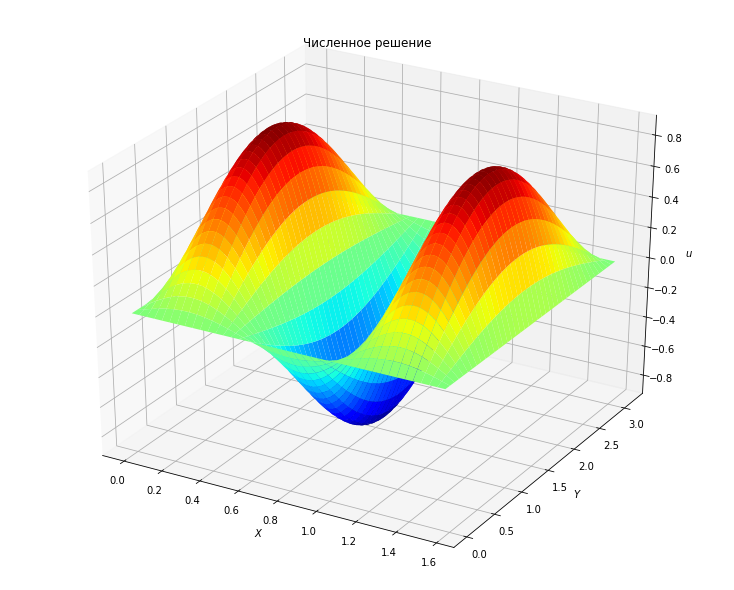

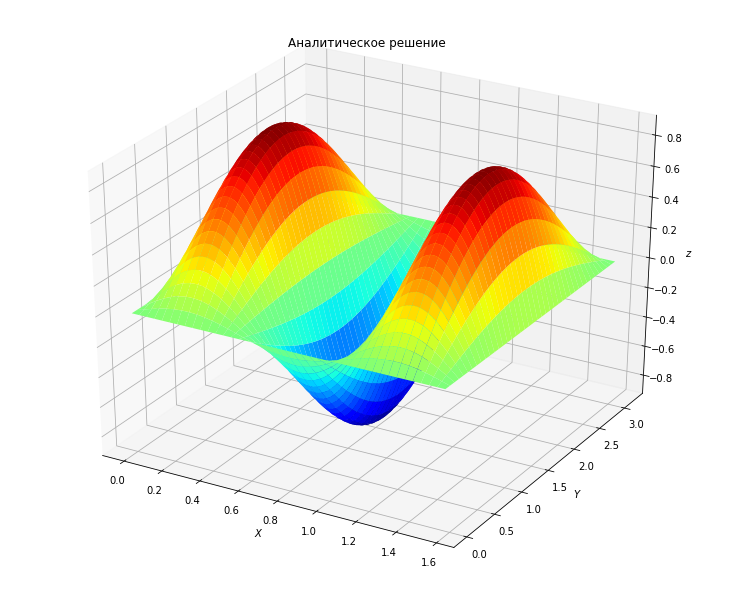

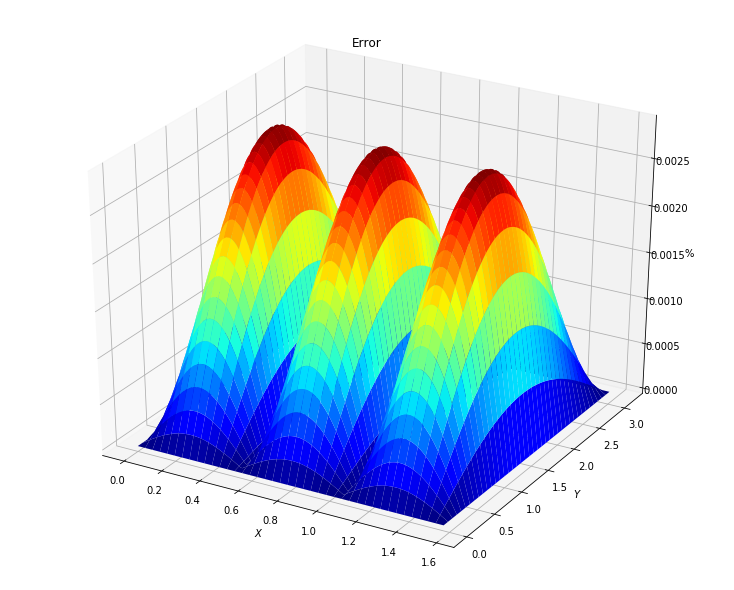

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
import warnings
warnings.filterwarnings('ignore')

# Задаём размер, границы и шаг сетки

N = 201
M = 201
J = 1001
j0 = 1

X = np.pi / 2
Y = np.pi
T = 1

hx = X / (N-1)
hy = Y / (M-1)
tau = T / (J-1)



# решение
u = np.zeros((N, M, J))
u_max = np.zeros(J)
err = np.zeros((N, M, J))

# аналитическое решение
z = np.zeros((N, M, J))

for j in range(J):
    if (j > j0):
        break
    mx = 0
    for n in range(N):
        for m in range(M):
            z[n, m, j] = np.exp(-9*13*j*tau)*np.sin(2*hx*n)*np.sin(3*hy*m)

            if mx < z[n, m, j]:
                mx = z[n, m, j]
    u_max[j] = mx





# значения на слое j+1/2:
w = np.zeros((N, M))


alpha_n = np.zeros(N)
beta_n = np.zeros(N)
f_x_n = np.zeros((N, M))

alpha_m = np.zeros(M)
beta_m = np.zeros(M)
f_y_m = np.zeros((N, M))

# Начальные условия
for n in np.arange(N):
    for m in np.arange(M):
        u[n, m, 0] = np.sin(2 * n * hx) * np.sin(3 * m * hy)


Ax = Bx = 4.5 * tau / (hx ** 2)
Cx = 1.0 + 9.0 * tau / (hx ** 2)

Ay = By = 4.5 * tau / (hy ** 2)
Cy = 1.0 + 9.0 * tau / (hy ** 2)


def F_x_n(n, m, j):
    return u[n, m, j] + 4.5 * tau / (hy ** 2) * (u[n, m + 1, j] - 2 * u[n, m, j] + u[n, m - 1, j])


def F_y_m(n, m):
    return w[n, m] + 4.5 * tau / (hx ** 2) * (w[n + 1, m] - 2 * w[n, m] + w[n - 1, m])


for j in range(0, J-1):
    if(j>j0):
        break

    # j -> j+1/2
    for m in range(1, M-1):
        alpha_n[0] = 0
        beta_n[0] = 0
        # Прямая прогонка
        for n in range(1, N-1):
            alpha_n[n] = Bx / (Cx - Ax * alpha_n[n - 1])

            beta_n[n] = (Ax * beta_n[n - 1] + F_x_n(n, m, j)) / (Cx - Ax * alpha_n[n - 1])

        w[N-1, m] = 0
        # Обратная прогонка
        for n in range(N - 2, -1, -1):
            w[n, m] = alpha_n[n] * w[n + 1, m] + beta_n[n]


    # j+1/2 -> j+1

    for n in range(1, N-1):
        alpha_m[0] = 0
        beta_m[0] = 0
        # Прямая прогонка
        for m in range(1, M-1):
            alpha_m[m] = By / (Cy - Ay * alpha_m[m - 1])

            beta_m[m] = (Ay * beta_m[m - 1] + F_y_m(n, m)) / (Cy - Ay * alpha_m[m - 1])

        # Обратная прогонка
        u[n, M-1, j + 1] = 0
        err[n,M-1,j+1] = abs(z[n,M-1,j+1] - u[n,M-1,j+1])*100/u_max[j]
        for m in range(M - 2, -1, -1):
            u[n, m, j + 1] = alpha_m[m] * u[n, m + 1, j + 1] + beta_m[m]
            err[n,m,j+1] = abs(z[n,m,j+1] - u[n,m,j+1])*100/u_max[j]

    # Граничные условия
    for m in range(M):
        u[0, m, j + 1] = 0
        u[N-1, m, j + 1] = 0
        err[0, m, j + 1] = abs(z[0, m, j + 1] - u[0, m, j + 1]) * 100 / u_max[j + 1]
        err[N-1, m, j + 1] = abs(z[N-1, m, j + 1] - u[N-1, m, j + 1]) * 100 / u_max[j + 1]





# Графики
x = np.linspace(0, np.pi / 2, N)
y = np.linspace(0, np.pi, M)

Xn, Ym = np.meshgrid(x, y)

print("J = 1000, T = 1")
frame1 = plt.figure(figsize=(10, 8))
frame2 = plt.figure(figsize=(10, 8))
frame3 = plt.figure(figsize=(10, 8))
axes1 = Axes3D(frame1)
axes2 = Axes3D(frame2)
axes3 = Axes3D(frame3)
axes1.plot_surface(Xn, Ym, u[:,:,j0], cmap='jet')
axes2.plot_surface(Xn, Ym, z[:,:,j0], cmap='jet')
axes3.plot_surface(Xn, Ym, err[:,:,j0], cmap='jet')

axes1.set_xlabel('$X$')
axes1.set_ylabel('$Y$')
axes1.set_zlabel('$u$')
axes1.set_title('Численное решение')

axes3.set_xlabel('$X$')
axes3.set_ylabel('$Y$')
axes3.set_zlabel('%')
axes3.set_title('Error')

axes2.set_xlabel('$X$')
axes2.set_ylabel('$Y$')
axes2.set_zlabel('$z $')
axes2.set_title('Аналитическое решение')
plt.show()



### J = 500, T = 1

![](1.png)
![](11.png)

### J = 100, T = 1

![](2.png)
![](22.png)